In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.impute import SimpleImputer

In [2]:
# Load and preprocess data
data = pd.read_csv('patients_data_with_RVoutcomes.csv')
data = data.dropna(subset=['Birthday'])


In [3]:
X = data.select_dtypes(exclude=['object', 'string'])
Y = data['RV Dysfunction']
# Prepare features and target
X = data.select_dtypes(exclude=['object', 'string'])
feature_names = X.columns
Y = data['RV Dysfunction']


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=feature_names)

# Group RV Dysfunction
Y_grouped = Y.replace({
    'Moderate': 'High Dysfunction',
    'Severe': 'High Dysfunction',
    'Normal': 'Low Dysfunction',
    'Mild': 'Low Dysfunction'
})

# Encode the grouped labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_grouped)


In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Cross-Validation Scores: [0.63157895 0.56842105 0.61702128 0.57446809 0.58510638]
Mean CV Accuracy: 0.5953 (+/- 0.0494)


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch

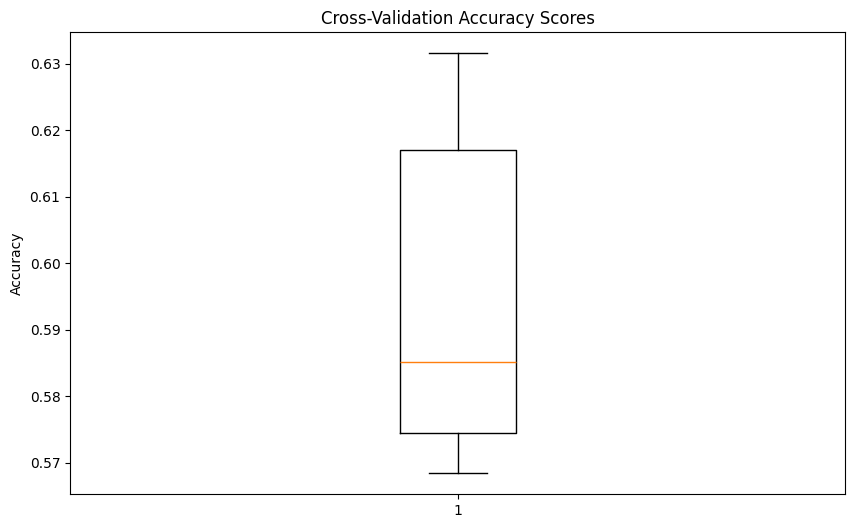

In [6]:
# Perform Cross-Validation
def perform_cross_validation(X, y, model, cv=5):
    # Use StratifiedKFold to maintain class distribution
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Compute cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    
    # Print cross-validation results
    print(f"\nCross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return cv_scores

# Initialize the model
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500, random_state=42)

# Perform cross-validation
cv_scores = perform_cross_validation(X_scaled, Y_encoded, log_reg)

# Visualize Cross-Validation Scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Detailed Cross-Validation with Per-Fold Metrics
def detailed_cross_validation(X, y, model, cv=5):
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    fold_metrics = []
    
    for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
        # Split data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Check class distribution in train and validation sets
        print(f"\nFold {fold}:")
        print("Training Labels Distribution:", np.bincount(y_train))
        print("Validation Labels Distribution:", np.bincount(y_val))
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predict and compute metrics
        y_pred = model.predict(X_val)
        
        # Check prediction class distribution
        print("Predicted Labels Distribution:", np.bincount(y_pred))
        
        accuracy = accuracy_score(y_val, y_pred)
        conf_matrix = confusion_matrix(y_val, y_pred)
        
        # Store metrics
        fold_metrics.append({
            'Fold': fold,
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix
        })
        
        print(f"Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(conf_matrix)
    
    return fold_metrics

# Run detailed cross-validation
detailed_metrics = detailed_cross_validation(X_scaled, Y_encoded, log_reg)
#OR ratio, same, leave one out c-v


Fold 1:
Training Labels Distribution: [ 17 142 218]
Validation Labels Distribution: [ 4 36 55]
Predicted Labels Distribution: [ 1 22 72]
Accuracy: 0.631578947368421
Confusion Matrix:
[[ 1  2  1]
 [ 0 12 24]
 [ 0  8 47]]

Fold 2:
Training Labels Distribution: [ 16 142 219]
Validation Labels Distribution: [ 5 36 54]
Predicted Labels Distribution: [ 0 35 60]
Accuracy: 0.5684210526315789
Confusion Matrix:
[[ 0  1  4]
 [ 0 17 19]
 [ 0 17 37]]

Fold 3:
Training Labels Distribution: [ 17 142 219]
Validation Labels Distribution: [ 4 36 54]
Predicted Labels Distribution: [ 3 19 72]
Accuracy: 0.6170212765957447
Confusion Matrix:
[[ 0  0  4]
 [ 0 13 23]
 [ 3  6 45]]

Fold 4:
Training Labels Distribution: [ 17 143 218]
Validation Labels Distribution: [ 4 35 55]
Predicted Labels Distribution: [ 1 30 63]
Accuracy: 0.574468085106383
Confusion Matrix:
[[ 0  1  3]
 [ 1 14 20]
 [ 0 15 40]]

Fold 5:
Training Labels Distribution: [ 17 143 218]
Validation Labels Distribution: [ 4 35 55]
Predicted Labels D

/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch


Fold 1 Results:
Accuracy: 0.631578947368421
Confusion Matrix:
[[ 1  2  1]
 [ 0 12 24]
 [ 0  8 47]]


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


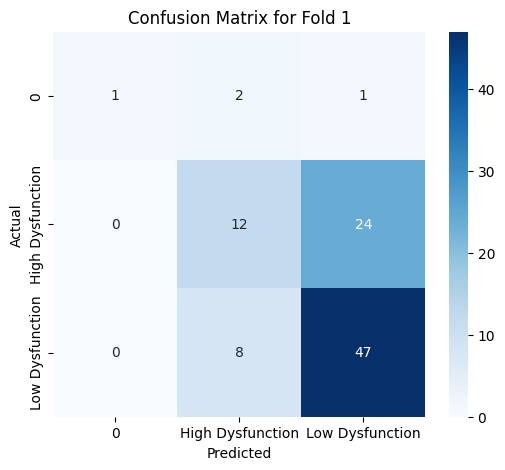

/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Fold 2 Results:
Accuracy: 0.5684210526315789
Confusion Matrix:
[[ 0  1  4]
 [ 0 17 19]
 [ 0 17 37]]


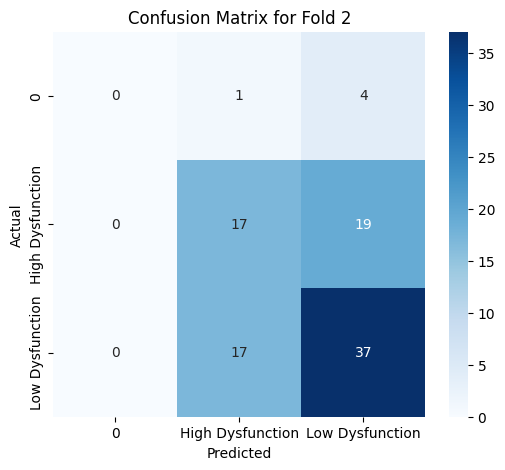


Fold 3 Results:
Accuracy: 0.6170212765957447
Confusion Matrix:
[[ 0  0  4]
 [ 0 13 23]
 [ 3  6 45]]


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


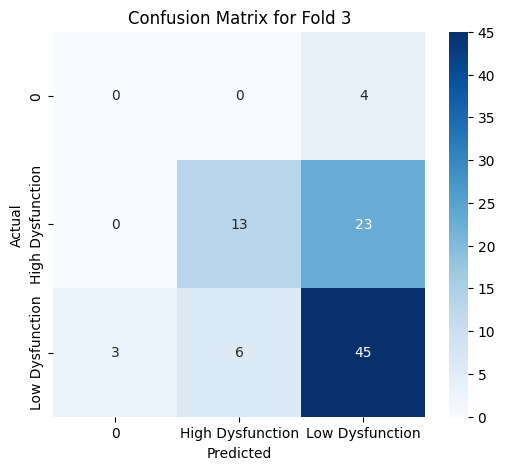


Fold 4 Results:
Accuracy: 0.574468085106383
Confusion Matrix:
[[ 0  1  3]
 [ 1 14 20]
 [ 0 15 40]]


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


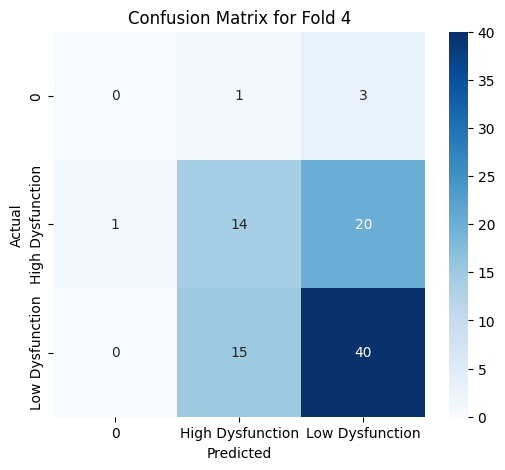


Fold 5 Results:
Accuracy: 0.5851063829787234
Confusion Matrix:
[[ 0  2  2]
 [ 1 16 18]
 [ 1 15 39]]


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


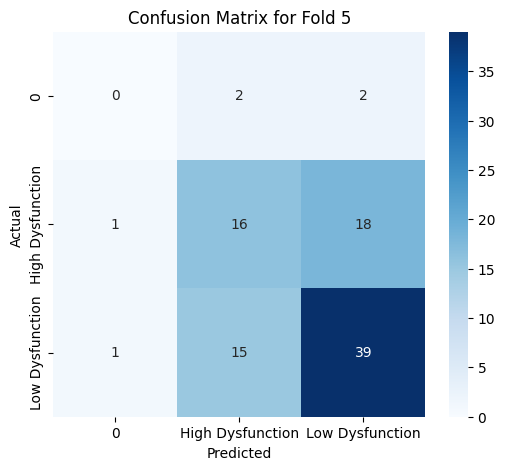

In [8]:
# Detailed Cross-Validation with Per-Fold Metrics and Confusion Matrix Heatmap
def detailed_cross_validation(X, y, model, cv=5):
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    fold_metrics = []
    
    for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y), 1):
        # Split data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predict and compute metrics
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        conf_matrix = confusion_matrix(y_val, y_pred)
        
        # Store metrics
        fold_metrics.append({
            'Fold': fold,
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix
        })
        
        # Print fold results
        print(f"\nFold {fold} Results:")
        print(f"Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(conf_matrix)
        
        # Plot confusion matrix as heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Confusion Matrix for Fold {fold}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    return fold_metrics

# Run detailed cross-validation
detailed_metrics = detailed_cross_validation(X_scaled, Y_encoded, log_reg)



Average Feature Importances Across Folds:


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch

<Figure size 1500x900 with 0 Axes>

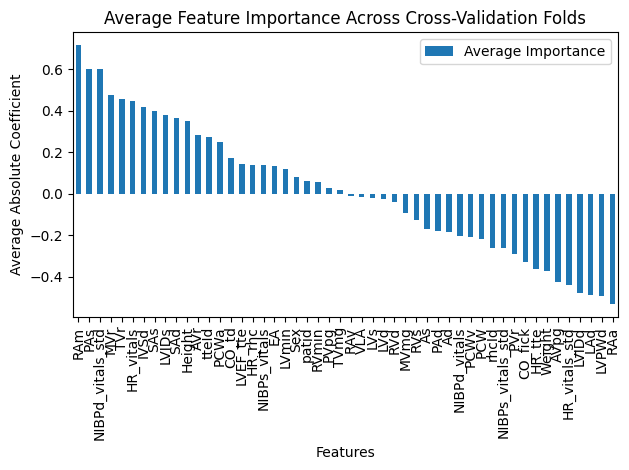

In [43]:
# Compute and display feature importances
def compute_feature_importance(X, y, model, cv=5):
    # Use StratifiedKFold to maintain class distribution
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    feature_importances = []
    
    for train_index, _ in stratified_kfold.split(X, y):
        # Extract training data
        X_train, y_train = X[train_index], y[train_index]
        
        # Fit model and extract coefficients
        model.fit(X_train, y_train)
        feature_importances.append(model.coef_[0])
    
    # Compute average feature importance
    avg_importances = np.mean(feature_importances, axis=0)
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Average Importance': (avg_importances)
    }).sort_values('Average Importance', ascending=False)
    
    return feature_importance_df

# Compute and display feature importances
feature_importances = compute_feature_importance(X_scaled, Y_encoded, log_reg)
print("\nAverage Feature Importances Across Folds:")
#print(feature_importances)

# Visualize Feature Importances
plt.figure(figsize=(15, 9))
feature_importances.plot(kind='bar', x='Feature', y='Average Importance', width=0.5)
plt.title('Average Feature Importance Across Cross-Validation Folds')
plt.xlabel('Features')
plt.ylabel('Average Absolute Coefficient')
plt.tight_layout()
plt.show()

17    0.716684
10    0.604363
29    0.599954
44    0.475361
46    0.458866
24    0.445587
38    0.417285
21    0.397429
34    0.378233
22    0.364282
3     0.350657
42    0.281767
32    0.273708
8     0.251117
5     0.173141
36    0.145750
23    0.139567
26    0.137558
37    0.134735
20    0.118952
2     0.081671
0     0.060269
13    0.055186
49    0.028163
47    0.019727
16   -0.011962
41   -0.016294
18   -0.020158
19   -0.027225
14   -0.038660
45   -0.094362
12   -0.124065
30   -0.172017
11   -0.179995
31   -0.186724
28   -0.204994
9    -0.209299
7    -0.216443
1    -0.259849
27   -0.263916
48   -0.290964
6    -0.326657
35   -0.363215
4    -0.373672
43   -0.427399
25   -0.441914
33   -0.477191
40   -0.489954
39   -0.495521
15   -0.530723
dtype: float64

Average Feature Importances Across Folds:
17    0.716684
10    0.604363
29    0.599954
44    0.475361
46    0.458866
24    0.445587
38    0.417285
21    0.397429
34    0.378233
22    0.364282
3     0.350657
42    0.281767
32    0.2737

/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/torch

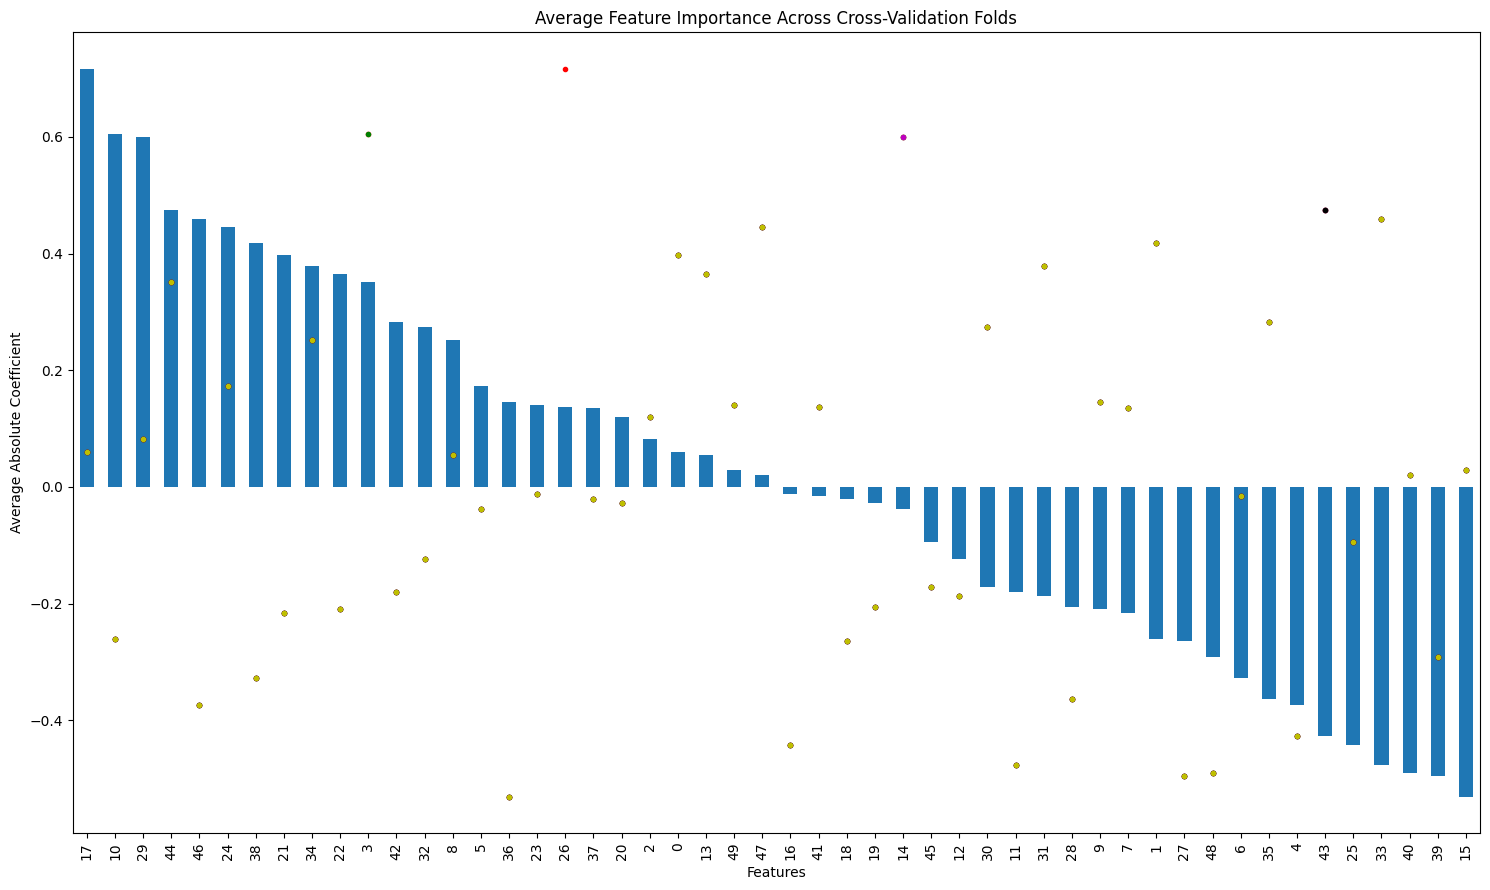

In [56]:
def compute_feature_importance(X, y, model, cv=5):
    # Use StratifiedKFold to maintain class distribution
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    feature_importances = []
    
    for train_index, _ in stratified_kfold.split(X, y):
        # Extract training data
        X_train, y_train = X[train_index], y[train_index]
        
        # Fit model and extract coefficients
        model.fit(X_train, y_train)
        feature_importances.append(model.coef_[0])
    
    # Convert to DataFrame and calculate mean across folds
    feature_importances_df = pd.DataFrame(feature_importances)
    avg_feature_importances = feature_importances_df.mean(axis=0)
    #x_val = feature_names
    # Sort the importances in descending order
    sorted_importances = avg_feature_importances.sort_values(ascending=False)
    print(sorted_importances)
    return sorted_importances

# Compute and display feature importances
data = compute_feature_importance(X_scaled, Y_encoded, log_reg)
print("\nAverage Feature Importances Across Folds:")
print(data)

# Visualize Feature Importances
plt.figure(figsize=(15, 9))
data.plot(kind='bar',x='Feature', y=' Importance', width=0.5)
arr1 = data[0:]
print(arr1)
plt.plot(arr1, '.', color = 'r')
arr2 = data[1:]
plt.plot(arr2, '.', color = 'g')
arr3 = data[2:]
plt.plot(arr3, '.', color = 'm')
arr4= data[3:]
plt.plot(arr4, '.', color = 'k')
arr5 = data[4:]
plt.plot(arr5, '.', color = 'y')
plt.title('Average Feature Importance Across Cross-Validation Folds')
plt.xlabel('Features')
plt.ylabel('Average Absolute Coefficient')
plt.tight_layout()
plt.show()


